In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
import tidy3d.web as web
from tidy3d.plugins.mode import ModeSolver


# Simulation Setup
Simulation of a microring resonator demultiplexer / filter. 
Consists of a ring resonator in the center, a bottom waveguide containing a mode source and the through port, and a top waveguide containing the drop port.

In [18]:
# ring resonator device parameters
wg_height = 0.220 # height of the waveguide (um)
wg_width = 0.440 # width of the waveguide (um)
start_radius = 2.0389
end_radius = 1.958
channels = 8
radius = np.linspace(start_radius, end_radius, channels)
print(radius)
gap = 0.140 # gap between the ring resonator and the straight waveguides (um)

[2.0389     2.02734286 2.01578571 2.00422857 1.99267143 1.98111429
 1.96955714 1.958     ]


In [19]:
# permittivity of the waveguide and substrate at 1550nm
si_eps = 12.085
sio2_eps = 2.0852

# wavelength (in um) and frequency (in Hz)
lambda_range = (1.52, 1.58) # corresponding to the C-band (1.53 to 1.565)
lambda0 = np.sum(lambda_range)/2
freq_range = (td.C_0 / lambda_range[1], td.C_0 / lambda_range[0])
freq0 = td.C_0 / lambda0
freqw = freq_range[1] - freq_range[0]

# frequencies and wavelengths of monitor
Nfreq = 2000
monitor_lambdas = np.linspace(lambda_range[0], lambda_range[1], Nfreq)
monitor_freqs = np.linspace(freq_range[0], freq_range[1], Nfreq)

# spacing between the waveguide and the PML
spacing = 0.8 #um

# simulation domain and total run time
sim_size = (5*spacing + 8*wg_width + 4*gap + 2*(radius[0]+radius[1]+radius[2]+radius[3]), 2*spacing + 3*wg_width + 2*gap + 2*radius[0] + 2*radius[4], wg_height + 2*spacing)
run_time = 10000/freq0
print("Run Time =", run_time)

# grid specification
grid_spec = td.GridSpec.auto(min_steps_per_wvl = 20, wavelength = lambda0)

# waveguide, substrate, and air material
mat_wg = td.Medium(
    permittivity = si_eps,
    name = "silicon",
)
mat_substrate = td.Medium(
    permittivity = sio2_eps,
    name = "silica",
)

# ring resonator 1
ring1_center = -sim_size[0]/2 + spacing + wg_width/2 + radius[0]

ring1_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring1_center, sim_size[1]/2 - spacing - radius[0] - wg_width/2, 0],
        radius = radius[0] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 1",
)
ring1_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring1_center, sim_size[1]/2 - spacing - radius[0] - wg_width/2, 0],
        radius = radius[0] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 1",
)

# ring resonator 2
ring2_center = ring1_center + radius[0] + 2*wg_width + gap + spacing + radius[1]

ring2_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring2_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[1]) - radius[1] - wg_width/2, 0],
        radius = radius[1] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 2",
)
ring2_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring2_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[1]) - radius[1] - wg_width/2, 0],
        radius = radius[1] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 2",
)

# ring resonator 3
ring3_center = ring2_center + radius[1] + 2*wg_width + gap + spacing + radius[2]

ring3_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring3_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[2]) - radius[2] - wg_width/2, 0],
        radius = radius[2] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 3",
)
ring3_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring3_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[2]) - radius[2] - wg_width/2, 0],
        radius = radius[2] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 3",
)

# ring resonator 4
ring4_center = ring3_center + radius[2] + 2*wg_width + gap + spacing + radius[3]

ring4_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring4_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[3]) - radius[3] - wg_width/2, 0],
        radius = radius[3] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 4",
)
ring4_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring4_center, sim_size[1]/2 - spacing - 2*(radius[0] - radius[3]) - radius[3] - wg_width/2, 0],
        radius = radius[3] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 4",
)

# ring resonator 5
ring5_center = -sim_size[0]/2 + spacing + wg_width/2 + radius[4]

ring5_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring5_center, -sim_size[1]/2 + spacing + radius[4] + wg_width/2, 0],
        radius = radius[4] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 5",
)
ring5_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring5_center, -sim_size[1]/2 + spacing + radius[4] + wg_width/2, 0],
        radius = radius[4] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 5",
)

# ring resonator 6
ring6_center = ring5_center + radius[4] + 2*wg_width + gap + spacing + radius[5]

ring6_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring6_center, -sim_size[1]/2 + spacing + 2*(radius[4] - radius[5]) + radius[5] + wg_width/2, 0],
        radius = radius[5] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 6",
)
ring6_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring6_center, -sim_size[1]/2 + spacing + 2*(radius[4] - radius[5]) + radius[5] + wg_width/2, 0],
        radius = radius[5] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 6",
)

# ring resonator 7
ring7_center = ring6_center + radius[5] + 2*wg_width + gap + spacing + radius[6]

ring7_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring7_center, -sim_size[1]/2 + spacing + 2*(radius[4] - radius[6]) + radius[6] + wg_width/2, 0],
        radius = radius[6] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 7",
)
ring7_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring7_center, -sim_size[1]/2 + spacing + 2*(radius[4] - radius[6]) + radius[6] + wg_width/2, 0],
        radius = radius[6] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 7",
)

# ring resonator 8
ring8_center = ring7_center + radius[6] + 2*wg_width + gap + spacing + radius[7]

ring8_outer = td.Structure(
    geometry = td.Cylinder(
        center = [ring8_center, -sim_size[1]/2 + spacing + 2*(radius[4] - radius[7]) + radius[7] + wg_width/2, 0],
        radius = radius[7] + wg_width/2,
        length = wg_height,
    ),
    medium = mat_wg,
    name = "Outer Ring 8",
)
ring8_inner = td.Structure(
    geometry = td.Cylinder(
        center = [ring8_center, -sim_size[1]/2 + spacing + 2*(radius[4] - radius[7]) + radius[7] + wg_width/2, 0],
        radius = radius[7] - wg_width/2,
        length = wg_height,
    ),
    medium = mat_substrate,
    name = "Inner Ring 8",
)


# input and output waveguides

waveguide_input = td.Structure(
    geometry = td.Box(
        center = [0, sim_size[1]/2 - spacing - 1.5*wg_width - 2*radius[0] - gap, 0],
        size = [td.inf, wg_width, wg_height],
    ),
    medium = mat_wg,
    name = "Input Waveguide"
)

waveguide_output1 = td.Structure(
    geometry = td.Box(
        center = [ring1_center + radius[0] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 1 Waveguide"
)

waveguide_output2 = td.Structure(
    geometry = td.Box(
        center = [ring2_center + radius[1] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 2 Waveguide"
)

waveguide_output3 = td.Structure(
    geometry = td.Box(
        center = [ring3_center + radius[2] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 3 Waveguide"
)

waveguide_output4 = td.Structure(
    geometry = td.Box(
        center = [ring4_center + radius[3] + wg_width + gap, sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[0], wg_height],
    ),
    medium = mat_wg,
    name = "Output 4 Waveguide"
)

waveguide_output5 = td.Structure(
    geometry = td.Box(
        center = [ring5_center + radius[4] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[4], wg_height],
    ),
    medium = mat_wg,
    name = "Output 5 Waveguide"
)

waveguide_output6 = td.Structure(
    geometry = td.Box(
        center = [ring6_center + radius[5] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[4], wg_height],
    ),
    medium = mat_wg,
    name = "Output 6 Waveguide"
)

waveguide_output7 = td.Structure(
    geometry = td.Box(
        center = [ring7_center + radius[6] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[4], wg_height],
    ),
    medium = mat_wg,
    name = "Output 7 Waveguide"
)

waveguide_output8 = td.Structure(
    geometry = td.Box(
        center = [ring8_center + radius[7] + wg_width + gap, -sim_size[1]/2, 0],
        size = [wg_width, 4.4 * radius[4], wg_height],
    ),
    medium = mat_wg,
    name = "Output 8 Waveguide"
)


# xy-plane frequency-domain field monitor at central frequency
field_mnt = td.FieldMonitor(
    center = [0,0,0],
    size = [np.inf, np.inf, 0],
    freqs = [td.C_0/1.532045, td.C_0/1.562227],
    name = "Field",
)

# through port flux monitor
flux_mnt_through = td.FluxMonitor(
    center = [sim_size[0]/2 - spacing, sim_size[1]/2 - spacing - 1.5*wg_width - 2*radius[0] - gap, 0],
    size = [0, 4 * wg_width, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Through Port)"
)

# drop port flux monitors

flux_mnt_drop1 = td.FluxMonitor(
    center = [ring1_center + radius[0] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 1)",
    normal_dir = "+"
)

flux_mnt_drop2 = td.FluxMonitor(
    center = [ring2_center + radius[1] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 2)",
    normal_dir = "+"
)

flux_mnt_drop3 = td.FluxMonitor(
    center = [ring3_center + radius[2] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 3)",
    normal_dir = "+"
)

flux_mnt_drop4 = td.FluxMonitor(
    center = [ring4_center + radius[3] + wg_width + gap, sim_size[1]/2 - spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 4)",
    normal_dir = "+"
)

flux_mnt_drop5 = td.FluxMonitor(
    center = [ring5_center + radius[4] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 5)",
    normal_dir = "-"
)

flux_mnt_drop6 = td.FluxMonitor(
    center = [ring6_center + radius[5] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 6)",
    normal_dir = "-"
)

flux_mnt_drop7 = td.FluxMonitor(
    center = [ring7_center + radius[6] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 7)",
    normal_dir = "-"
)

flux_mnt_drop8 = td.FluxMonitor(
    center = [ring8_center + radius[7] + wg_width + gap, -sim_size[1]/2 + spacing, 0],
    size = [4 * wg_width, 0, 6 * wg_height],
    freqs = monitor_freqs,
    name = "Flux Monitor (Drop Port 8)",
    normal_dir = "-"
)


# simulation
sim = td.Simulation(
    size = sim_size,
    grid_spec = grid_spec,
    symmetry = [0, 0, 1],
    structures = [ring1_outer, ring1_inner, ring2_outer, ring2_inner, ring3_outer, ring3_inner, ring4_outer, ring4_inner, ring5_outer, ring5_inner, ring6_outer, ring6_inner, ring7_outer, ring7_inner, ring8_outer, ring8_inner, 
                  waveguide_input, waveguide_output1, waveguide_output2, waveguide_output3, waveguide_output4, waveguide_output5, waveguide_output6, waveguide_output7, waveguide_output8],
    medium = mat_substrate,
    sources = [],
    monitors = [flux_mnt_through, flux_mnt_drop1, flux_mnt_drop2, flux_mnt_drop3, flux_mnt_drop4, flux_mnt_drop5, flux_mnt_drop6, flux_mnt_drop7, flux_mnt_drop8],
    run_time = run_time,
    shutoff = 1e-7,
    boundary_spec = td.BoundarySpec.all_sides(boundary = td.PML())
)

sim.plot_3d()

Run Time = 5.170243475571357e-11


# Source Setup
Define a mode source that launches the TE0 mode into the input waveguide.

Effective index of computed modes:  [[2.40791416]]
Group index of computed modes:  [[4.19560051]]


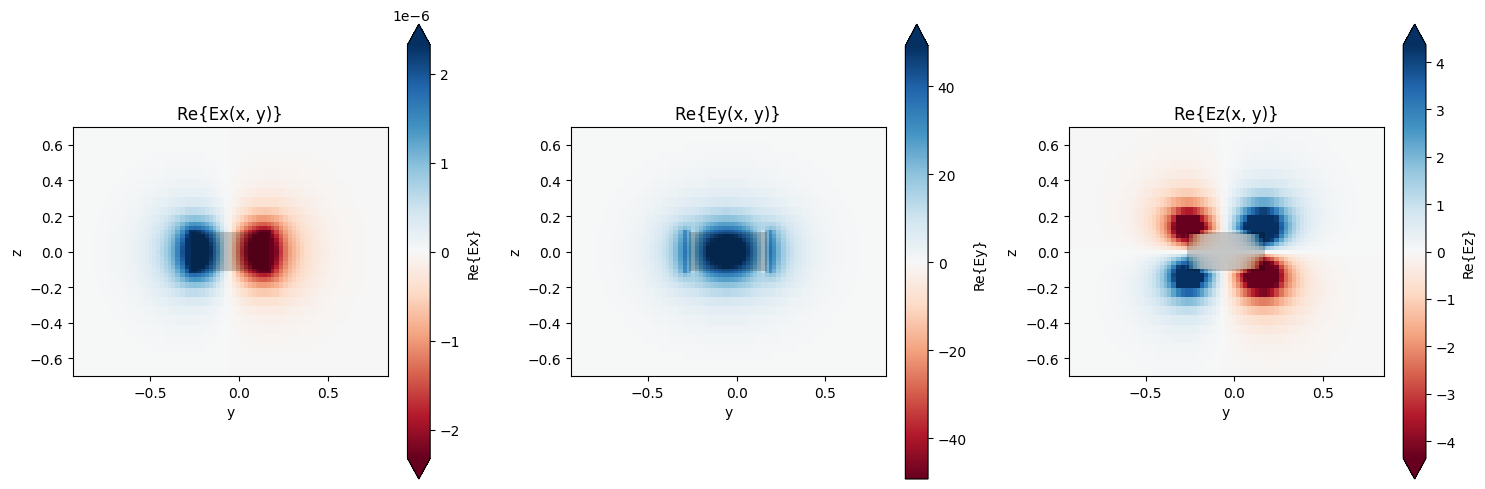

In [13]:
# position and size of source plane
source_plane = td.Box(
    center = (-sim_size[0]/2 + spacing, sim_size[1]/2 - spacing - 1.5*wg_width - 2*radius[0] - gap, 0),
    size = (0,  4 * wg_width, 6 * wg_height)
)

# number of modes to solve
num_modes = 1

# setup and solve for modes
mode_spec = td.ModeSpec(num_modes = num_modes, group_index_step = True, target_neff = 3.48, filter_pol = 'te')
ms = ModeSolver(simulation = sim, plane = source_plane, mode_spec = mode_spec, freqs = [freq0])
mode_data = ms.solve()

print("Effective index of computed modes: ", np.array(mode_data.n_eff))
print("Group index of computed modes: ", np.array(mode_data.n_group))

# visualise the mode
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), tight_layout = True)
ms.plot_field("Ex", "real", f = freq0, mode_index = 0, ax = ax1)
ms.plot_field("Ey", "real", f = freq0, mode_index = 0, ax = ax2)
ms.plot_field("Ez", "real", f = freq0, mode_index = 0, ax = ax3)
ax1.set_title("Re{Ex(x, y)}")
ax2.set_title("Re{Ey(x, y)}")
ax3.set_title("Re{Ez(x, y)}")
plt.show()

# add mode source at the input of the waveguide
source_time = td.GaussianPulse(freq0 = freq0, fwidth = 0.5*freqw)
mode_source = ms.to_source(mode_index = 0, direction = "+", source_time = source_time)

sim = sim.copy(update = {"sources" : [mode_source]})

# Plot Simulation Setup

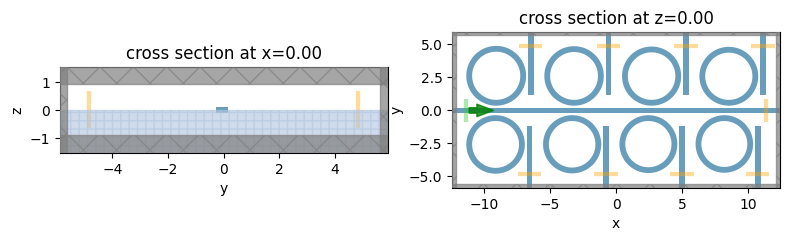

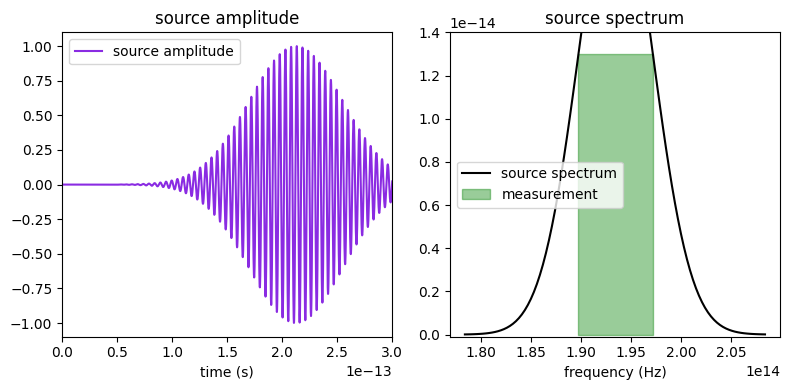

In [14]:
fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (8,4))
sim.plot(x = 0, ax = ax[0]);
sim.plot(z = 0, ax = ax[1]);
plt.show()

# Check probe and source
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8, 4))
plot_time = 0.3e-12
ax1 = sim.sources[0].source_time.plot(times=np.linspace(0, plot_time, 10000), ax=ax1)
ax1.set_xlim(0, plot_time)
ax1.legend(('source amplitude',))
ax2 = sim.sources[0].source_time.plot_spectrum(times=np.linspace(0, sim.run_time, 100000), val = 'abs', ax=ax2)
fill_max = 13e-15
ymax = 14e-15
ax2.fill_between(freq_range, [0,0], [fill_max, fill_max], alpha=0.4, color='g')
ax2.legend(('source spectrum', 'measurement'))
ax2.set_ylim(-1e-16, ymax)
plt.show()

sim.plot_3d()



In [15]:
# initializes job, puts task on server (but doesnt run it)
job = web.Job(simulation=sim, task_name="8 channel new", verbose=True)

# estimate the maximum cost
estimated_cost = web.estimate_cost(job.task_id)

14:17:41 GMT Standard Time WARNING: Simulation has 1.73e+06 time steps. The     
                           'run_time' may be unnecessarily large, unless there  
                           are very long-lived resonances.                      

14:17:42 GMT Standard Time Created task '8 channel new' with task_id            
                           'fdve-a06a7c09-1435-4484-929e-8cae5f629eea' and      
                           task_type 'FDTD'.

                           View task using web UI at                            
                           ]8;id=337733;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=295084;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\taskId]8;;\]8;id=337733;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\=]8;;\]8;id=585084;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\fdv]8;;\
                           ]8;id=585084;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\e]8;;\]8;id=337733;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\-a06a7c09-1435-4484-929e-8cae5f629eea']8;;\.

Output()

14:17:46 GMT Standard Time Maximum FlexCredit cost: 10.818. Minimum cost depends
                           on task execution details. Use                       
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

In [16]:
sim_data = job.run(path="data/nine_channel.hdf5")

14:17:50 GMT Standard Time status = queued

                           To cancel the simulation, use 'web.abort(task_id)' or
                           'web.delete(task_id)' or abort/delete the task in the
                           web UI. Terminating the Python script will not stop  
                           the job running on the cloud.

Output()

14:17:55 GMT Standard Time status = preprocess

14:18:00 GMT Standard Time Maximum FlexCredit cost: 10.818. Use                 
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

                           starting up solver

                           running solver

Output()

15:00:05 GMT Standard Time early shutoff detected at 88%, exiting.

                           status = postprocess

Output()

15:00:09 GMT Standard Time status = success

                           View simulation result at                            
                           ]8;id=55603;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=801022;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\taskId]8;;\]8;id=55603;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\=]8;;\]8;id=266054;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\fdv]8;;\
                           ]8;id=266054;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\e]8;;\]8;id=55603;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a06a7c09-1435-4484-929e-8cae5f629eea\-a06a7c09-1435-4484-929e-8cae5f629eea']8;;\.

Output()

15:00:14 GMT Standard Time loading simulation from data/nine_channel.hdf5

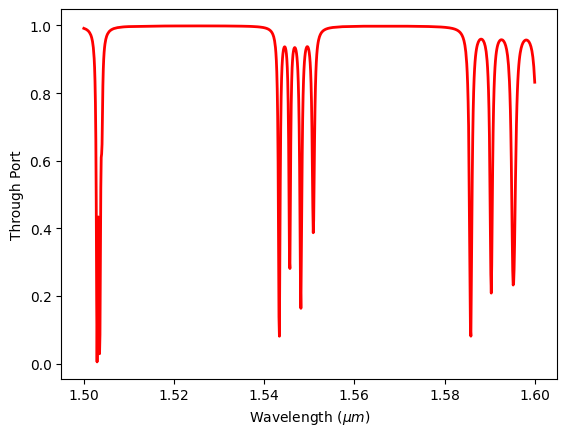

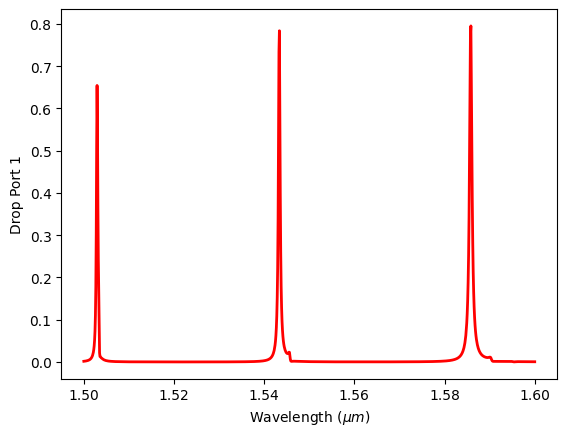

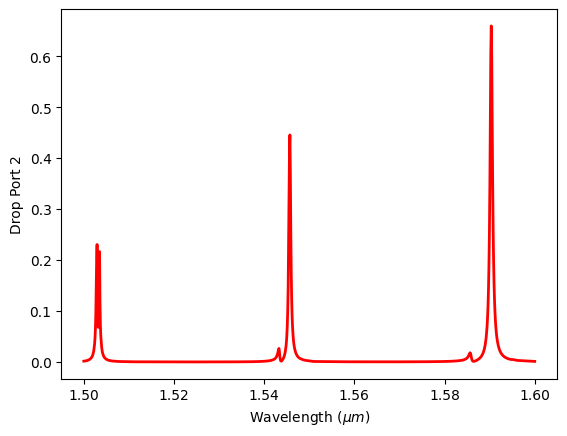

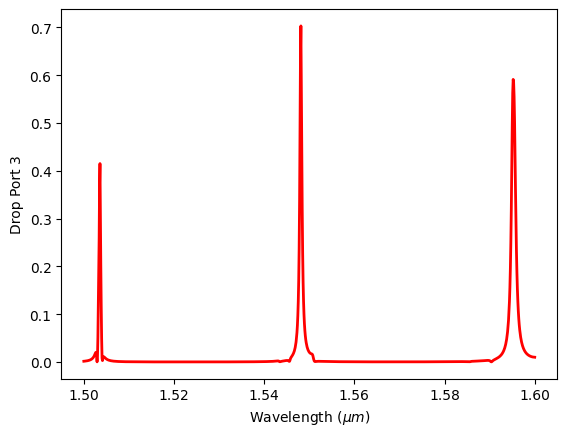

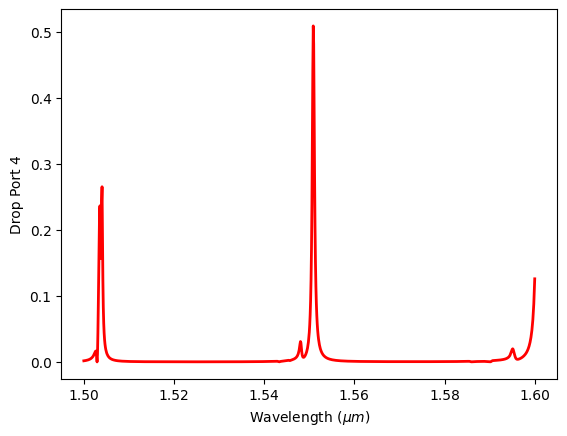

In [57]:
T1 = sim_data["Flux Monitor (Through Port)"].flux
T2 = sim_data["Flux Monitor (Drop Port 1)"].flux
T3 = sim_data["Flux Monitor (Drop Port 2)"].flux
T4 = sim_data["Flux Monitor (Drop Port 3)"].flux
T5 = sim_data["Flux Monitor (Drop Port 4)"].flux
measured_f = sim_data["Flux Monitor (Through Port)"].flux.f

plt.plot(td.C_0 / measured_f, T1, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Through Port")
plt.show()

plt.plot(td.C_0 / measured_f, T2, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 1")
plt.show()

plt.plot(td.C_0 / measured_f, T3, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 2")
plt.show()

plt.plot(td.C_0 / measured_f, T4, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 3")
plt.show()

plt.plot(td.C_0 / measured_f, T5, "red", linewidth=2)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Drop Port 4")
plt.show()

